In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
sns.set(style='ticks', palette='Set2')
sns.despine()
sns.set_context("talk")
plt.rcParams["font.family"] = "serif"

<Figure size 432x288 with 0 Axes>

In [2]:
columns = ["Name","alpha","delta","e_eps","model","pick_neighbor","test/acc","dataset"]

In [3]:
# df_cora = pd.read_csv('cora_top.csv')
# df_lastfm = pd.read_csv('lastfm_top.csv')
# df_pubmed = pd.read_csv('pubmed_top.csv')
# df_facebook = pd.read_csv('facebook_top.csv')
# # df_top = pd.read_csv('top.csv')
# df_common = pd.concat([df_cora, df_facebook, df_lastfm, df_pubmed], axis=0)
# df_rr = pd.read_csv('rr.csv')
# df_common = pd.concat([df_common, df_rr], axis=0)
# # df_common.to_csv('common.csv', index=False)

df_common = pd.read_csv('common.csv')

In [4]:
def vary_budget(df, a, d):

    g = sns.catplot(kind='point', data=df, x='e_eps', y='test/acc', row='dataset', col='model', hue='pick_neighbor', ci=None, sharex=True, sharey=True, palette="husl", height=4, aspect=1, margin_titles=True)

    g.set_axis_labels("$e_{\epsilon}$", "Accuracy")
    # g.set_titles(col_template="{col_name}", row_template="{row_name}")
    g.tight_layout()

    datasets = {' cora':'Cora',
                ' lastfm':'LastFM',
                ' facebook':'Facebook',
                ' pubmed':'Pubmed'}
    models = {' gcn':'GCN',
            ' sage':'GraphSAGE',
            ' gat':'GAT'}
    # Iterate thorugh each axis
    for ax in g.axes.flat:
        # Make x and y-axis labels slightly larger
        ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')
        ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')

        # Make title more human-readable and larger
        if ax.get_title():
        #     print(models[ax.get_title().split('=')[1]])
            ax.set_title(models[ax.get_title().split('=')[1]],
                        fontsize='x-large')

        # Make right ylabel more human-readable and larger
        # Only the 2nd and 4th axes have something in ax.texts
        if ax.texts:
            # This contains the right ylabel text
            txt = ax.texts[0]
            ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                    datasets[txt.get_text().split('=')[1]],
                    transform=ax.transAxes,
                    va='center',
                    fontsize='x-large')
            # Remove the original text
            ax.texts[0].remove()

    # Setting legend
    # for txt in g.legend.get_texts():
    #     print(txt[0])
    g.legend.set_title('Method')
    g.legend.get_texts()[0].set_text('GraphPrivatizer-n')
    g.legend.get_texts()[1].set_text('GraphPrivatizer-t')

    sns.move_legend(g, loc="center right", bbox_to_anchor=(1, 1))

    g.savefig('./images/vary_budget/'+str(a)+'_'+str(d)+'.pdf', dpi=400)

In [22]:
df_fixed_eps = df_common[df_common['e_eps']==0.1]
# df_common['e_eps'].unique()

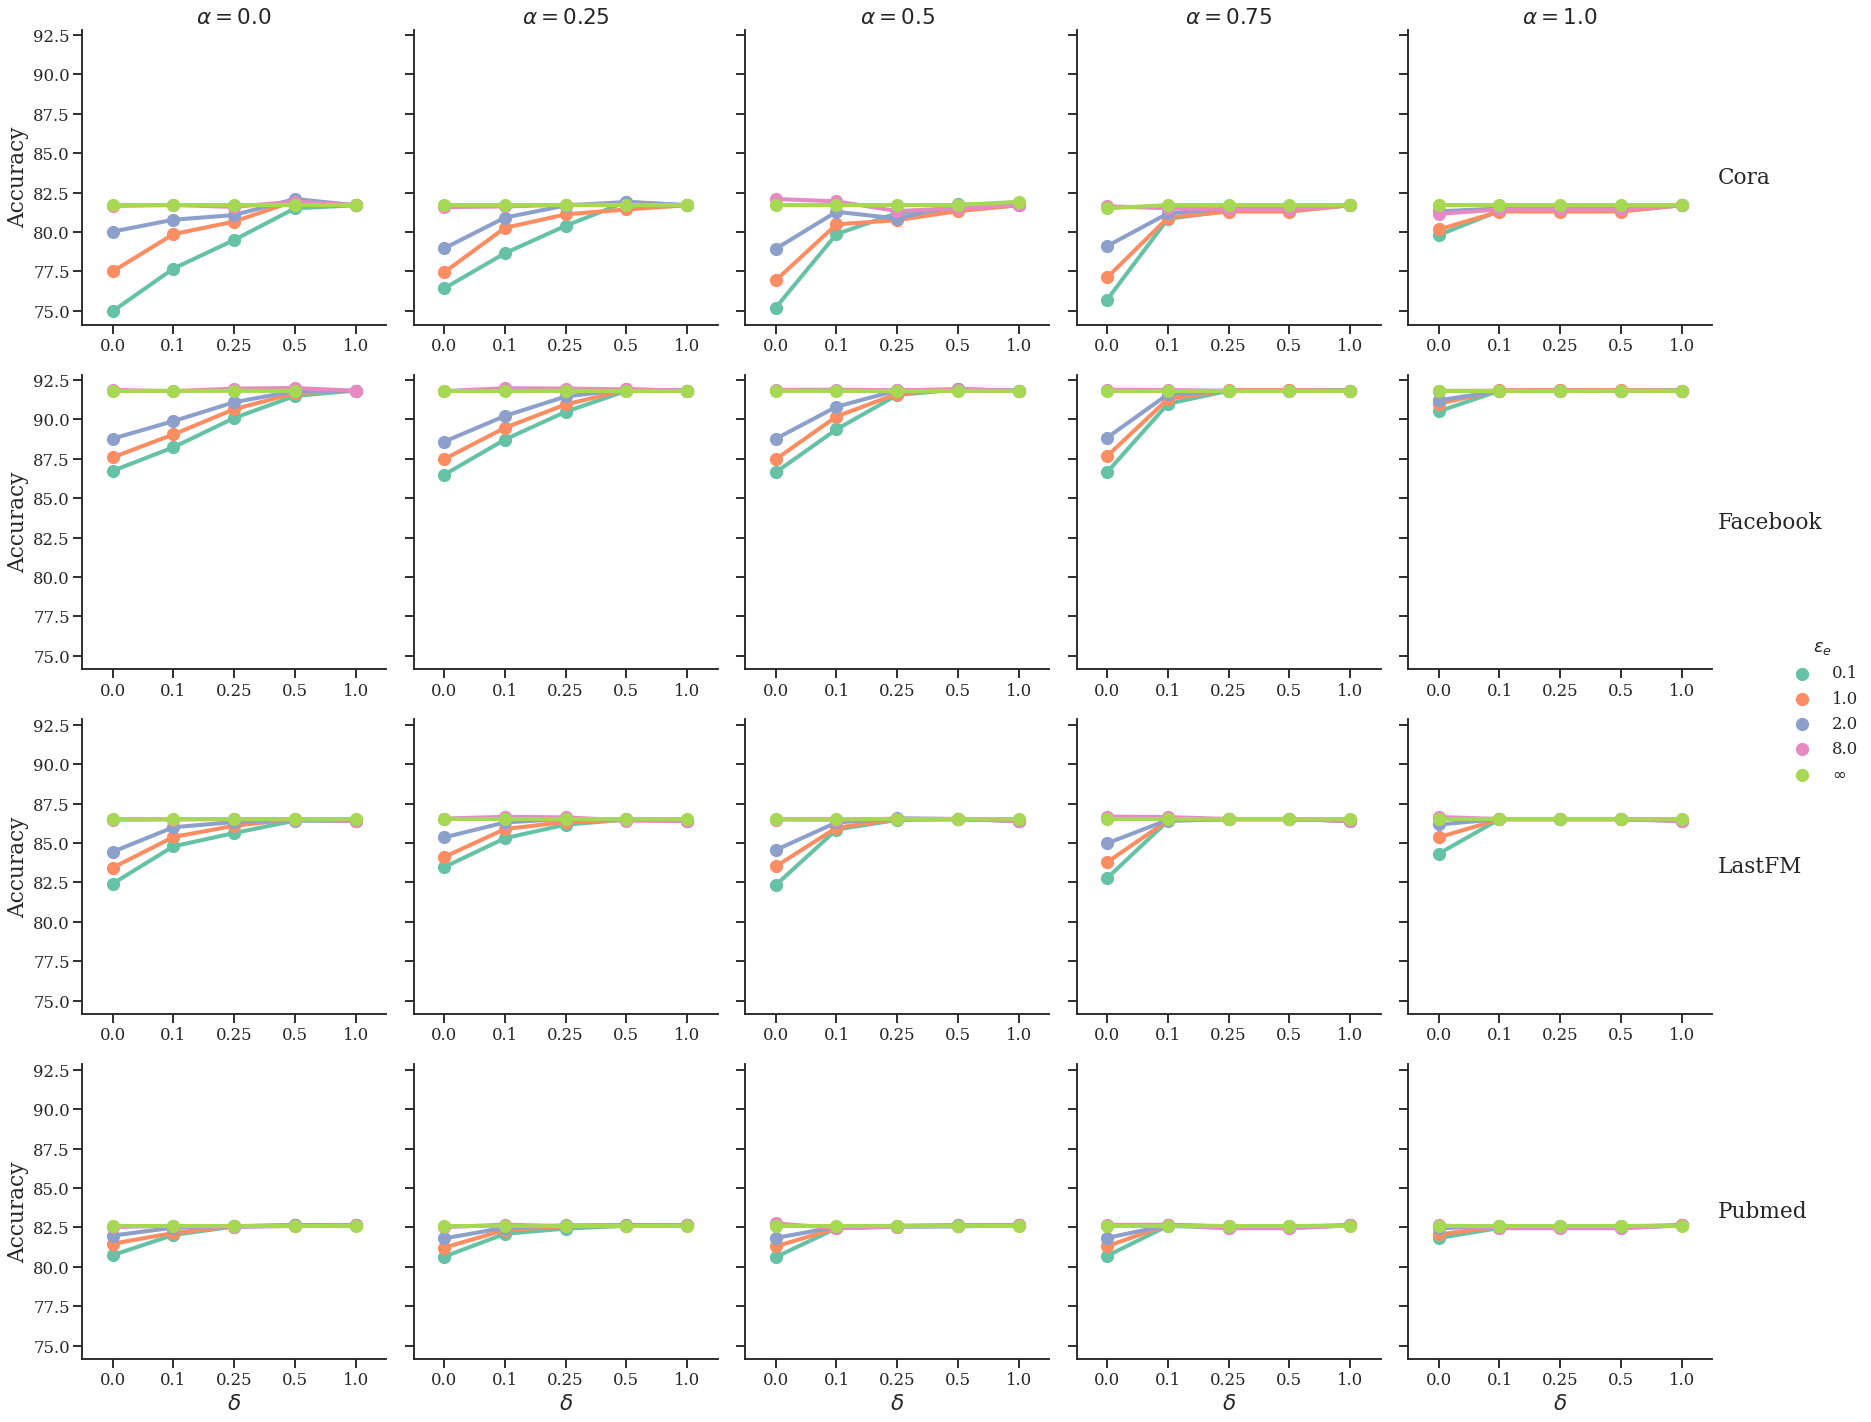

In [114]:
# df_fixed_eps
df_fixed_gcn = df_common[df_common['model']=='gcn']
df_fixed_gcn = df_fixed_gcn[df_fixed_gcn['pick_neighbor']=='rr']
g = sns.catplot(kind='point', data=df_fixed_gcn, x='delta', y='test/acc', row='dataset', col='alpha', hue='e_eps', ci=None, sharex=False, sharey=True, margin_titles=True)

datasets = {' cora':'Cora',
            ' lastfm':'LastFM',
            ' facebook':'Facebook',
            ' pubmed':'Pubmed'}
alpha = {' 0.0'  : '$\\alpha = 0.0$',
            ' 0.25'  :   '$\\alpha = 0.25$',
            ' 0.5'   :   '$\\alpha = 0.5$',
            ' 0.75'  :   '$\\alpha = 0.75$',
            ' 1.0'   :   '$\\alpha = 1.0$'}

for ax in g.axes.flat:
    # Make x and y-axis labels slightly larger
    ax.set_xlabel(ax.get_xlabel(), fontsize='large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='large')

    # Make title more human-readable and larger
    if ax.get_title():
        # print(alpha[ax.get_title().split('=')[1]])
        # print(ax.get_title())
        # print(ax.get_title().split('='))
        
        ax.set_title(alpha[ax.get_title().split('=')[1]], fontsize='large')

    # Make right ylabel more human-readable and larger
    # Only the 2nd and 4th axes have something in ax.texts
    if ax.texts:
        # This contains the right ylabel text
        txt = ax.texts[0]
        ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                datasets[txt.get_text().split('=')[1]],
                transform=ax.transAxes,
                va='center',
                fontsize='large')
        # Remove the original text
        ax.texts[0].remove()

# Setting legend
# for txt in g.legend.get_texts():
#     print(txt[0])
g.legend.set_title('$\epsilon_e$')
g.legend.get_texts()[4].set_text('$\infty$')
# g.legend.get_texts()[1].set_text('GraphPrivatizer-t')
g.set_xlabels('$\delta$')
g.set_ylabels('Accuracy')

sns.move_legend(g, loc="center right", bbox_to_anchor=(1, 0.5))
g.savefig('./images/fixed_rr_gcn.pdf', dpi=400)

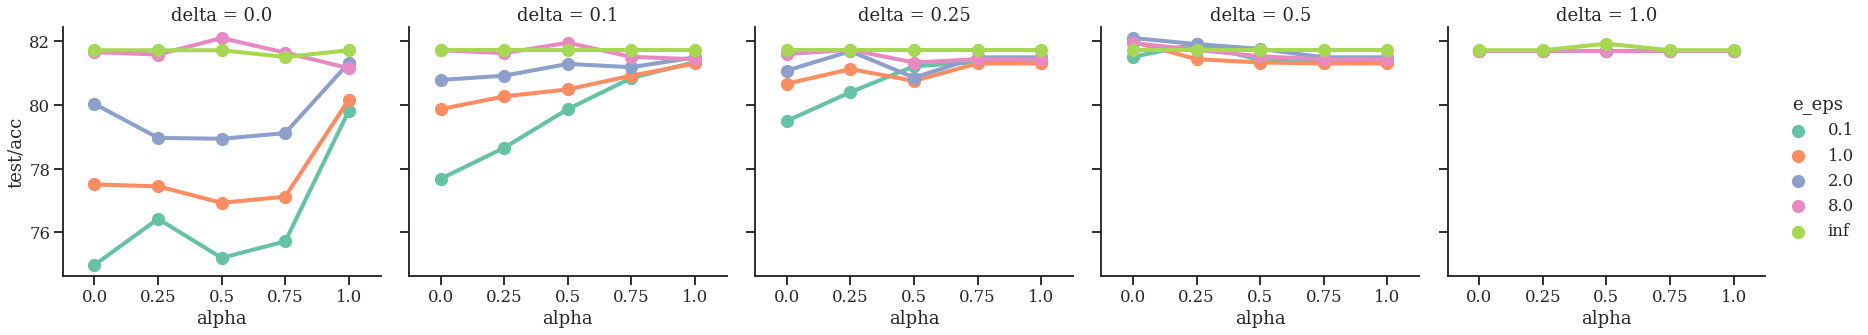

In [36]:
# df_fixed_model = df_common[df_common['model']=='sage']
df_fixed_gcn_cora = df_fixed_gcn[df_fixed_gcn['dataset']=='cora']
ax = sns.catplot(kind='point', data=df_fixed_gcn_cora, x='alpha', y='test/acc', col='delta', hue='e_eps', ci=None, sharex=True, sharey=True)

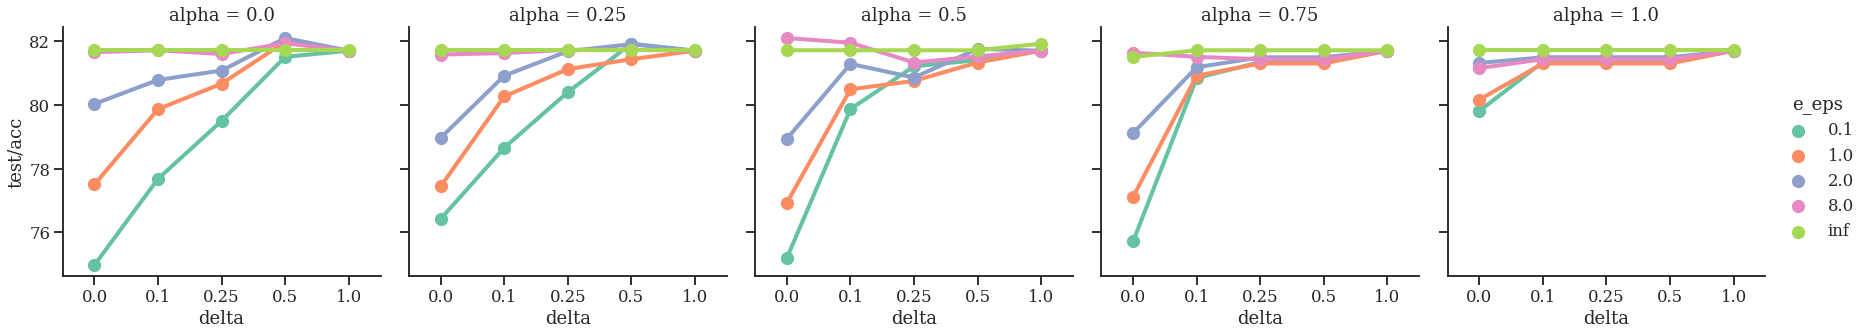

In [37]:
ax = sns.catplot(kind='point', data=df_fixed_gcn_cora, x='delta', y='test/acc', col='alpha', hue='e_eps', ci=None, sharex=True, sharey=True)

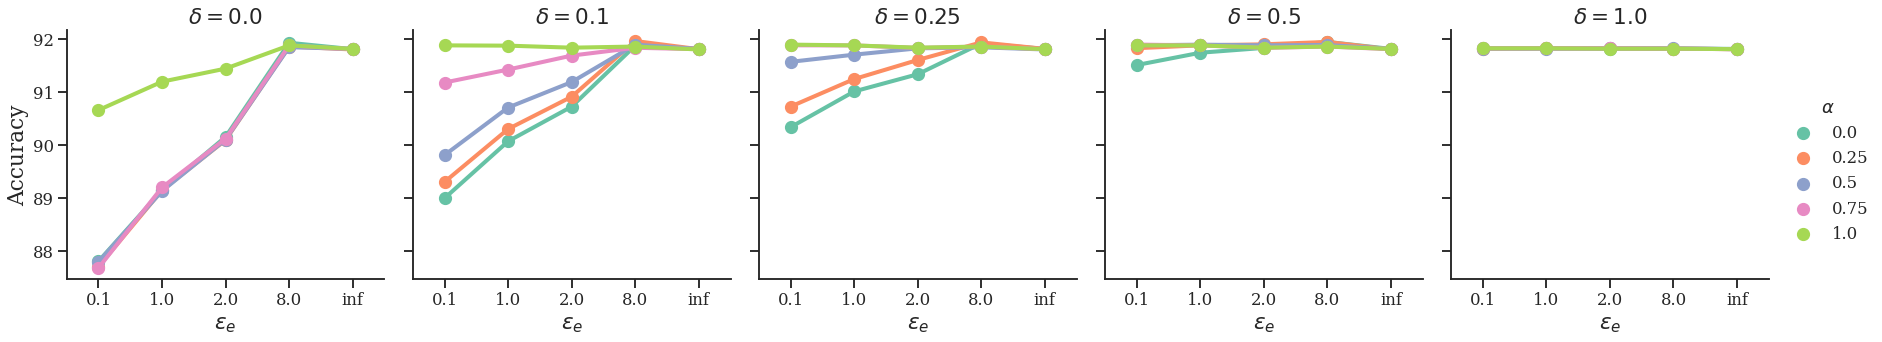

In [113]:
df_fixed_gcn_cora = df_common[df_common['dataset']=='facebook']
df_fixed_gcn_cora = df_fixed_gcn_cora[df_fixed_gcn_cora['model']=='gcn']
df_fixed_gcn_cora_rr = df_fixed_gcn_cora[df_fixed_gcn_cora['pick_neighbor']=='rr']
g = sns.catplot(kind='point', data=df_fixed_gcn_cora, x='e_eps', y='test/acc', col='delta', hue='alpha', ci=None, sharex=False, sharey=True)

delta = {' 0.0'  : '$\delta = 0.0$',
            ' 0.1'  :   '$\delta = 0.1$',
            ' 0.25'   :   '$\delta = 0.25$',
            ' 0.5'  :   '$\delta = 0.5$',
            ' 1.0'   :   '$\delta = 1.0$'}

for ax in g.axes.flat:
    # Make x and y-axis labels slightly larger
    ax.set_xlabel(ax.get_xlabel(), fontsize='large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='large')

    # Make title more human-readable and larger
    if ax.get_title():
        # print(alpha[ax.get_title().split('=')[1]])
        # print(ax.get_title())
        # print(ax.get_title().split('=')[1].split('$')[0])
        
        ax.set_title(delta[ax.get_title().split('=')[1].split('$')[0]], fontsize='large')


# Setting legend
# for txt in g.legend.get_texts():
#     print(txt[0])
g.legend.set_title('$\\alpha$')
# g.legend.get_texts()[4].set_text('$\infty$')
# g.legend.get_texts()[1].set_text('GraphPrivatizer-t')
g.set_xlabels('$\epsilon_e$')
g.set_ylabels('Accuracy')

sns.move_legend(g, loc="center right", bbox_to_anchor=(1, 0.5))
g.savefig('./images/fixed_rr_gcn_facebook.pdf', dpi=400)

In [12]:
# Uncomment to plot for varying privacy budges for different values of alpha and delta.

# alpha=[0, 0.25, 0.5, 0.75, 1]
# delta=[0, 0.1, 0.25, 0.5, 1]

# for a in alpha:
#     for d in delta:
#         # print(a, d)
#         df_fixed_a_d = df_common[(df_common['alpha']==a) & (df_common['delta']==d)]
#         vary_budget(df_fixed_a_d, a, d)

In [13]:
# fig, axes = plt.subplots(3, 4, sharey=True, figsize=(32, 16))

# for c, dataset in enumerate(datasets):
#     # print(c, dataset)
#     g = sns.scatterplot(ax=axes[0, c], data=df_fixed_model_dataset[(df_fixed_model_dataset['dataset']==dataset)], x='e_eps', y='test/acc',  hue='pick_neighbor')
#     g.legend_.remove()
#     g = sns.scatterplot(ax=axes[1, c], data=df_fixed_model_dataset[(df_fixed_model_dataset['dataset']==dataset)], x='alpha', y='test/acc',  hue='pick_neighbor')
#     g.legend_.remove()
#     g = sns.scatterplot(ax=axes[2, c], data=df_fixed_model_dataset[(df_fixed_model_dataset['dataset']==dataset)], x='delta', y='test/acc',  hue='pick_neighbor')
#     g.legend_.remove()

 0.0
 0.1
 0.25
 0.5
 1.0


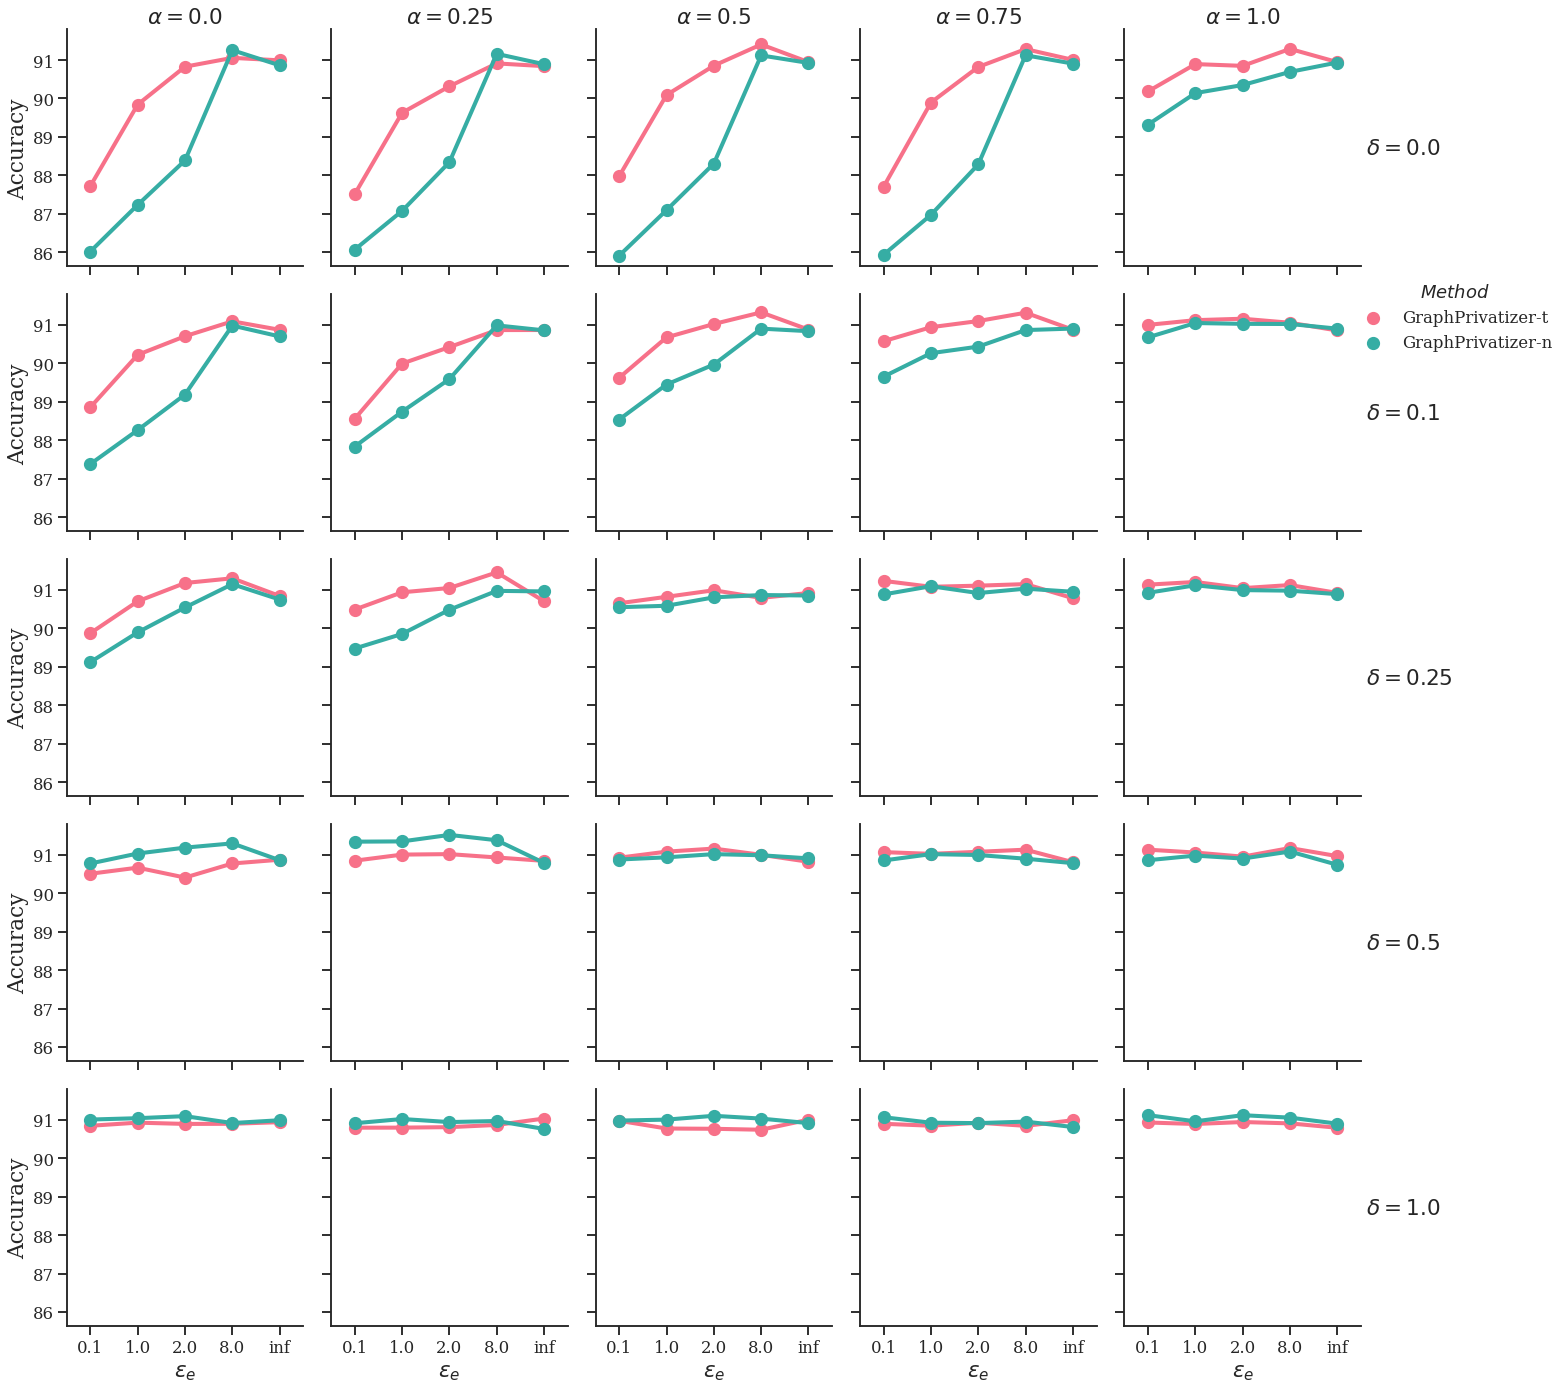

In [115]:
# Uncomment to generate results for fixed model and dataset

datasets = ['cora', 'pubmed', 'lastfm', 'facebook']
datasets = ['facebook']
models = ['gcn', 'gat', 'sage']
models = ['gat']
e_eps=[0.1, 1, 2, 8, np.inf]
alpha=[0, 0.25, 0.5, 0.75, 1]
delta=[0, 0.1, 0.25, 0.5, 1]

for model in models:
    # df_fixed_model_dataset = df_common[(df_common['model']==model)]

    for dataset in datasets:
        df_fixed_model_dataset = df_common[(df_common['dataset']==dataset) & (df_common['model']==model)]
        # print(df_fixed_model_dataset.head())
        # fig, axes = plt.subplots(5, 5, sharey=True, figsize=(32, 16))
        # for c, a in enumerate(alpha):

        #     for r, d in enumerate(delta):

        #         g = sns.scatterplot(ax=axes[r, c], data=df_fixed_model_dataset[(df_fixed_model_dataset['alpha']==a) & (df_fixed_model_dataset['delta']==d)], x='e_eps', y='test/acc',  hue='pick_neighbor')
        #         # g.legend_.remove()

        # g = sns.catplot(data=df_fixed_model_dataset, kind='point', row='delta', col='alpha', x='e_eps', y='test/acc', hue='pick_neighbor', sharex=True, sharey=True)

        g = sns.catplot(kind='point', data=df_fixed_model_dataset, x='e_eps', y='test/acc', row='delta', col='alpha', hue='pick_neighbor', ci=None, sharex=True, sharey=True, palette="husl", height=4, aspect=1, margin_titles=True)

        g.fig.subplots_adjust(top=0.95) # adjust the Figure in g
        # g.fig.suptitle('Dataset: '+dataset.title()+', Model: '+model.upper())

        delta = {' 0.0'  : '$\delta = 0.0$',
            ' 0.1'  :   '$\delta = 0.1$',
            ' 0.25'   :   '$\delta = 0.25$',
            ' 0.5'  :   '$\delta = 0.5$',
            ' 1.0'   :   '$\delta = 1.0$'}
        
        alpha = {' 0.0'  : '$\\alpha = 0.0$',
            ' 0.25'  :   '$\\alpha = 0.25$',
            ' 0.5'   :   '$\\alpha = 0.5$',
            ' 0.75'  :   '$\\alpha = 0.75$',
            ' 1.0'   :   '$\\alpha = 1.0$'}
        
        for ax in g.axes.flat:
            # Make x and y-axis labels slightly larger
            ax.set_xlabel(ax.get_xlabel(), fontsize='large')
            ax.set_ylabel(ax.get_ylabel(), fontsize='large')

            # Make title more human-readable and larger
            if ax.get_title():
                ax.set_title(alpha[ax.get_title().split('=')[1]], fontsize='large')

            # Make right ylabel more human-readable and larger
            # Only the 2nd and 4th axes have something in ax.texts
            if ax.texts:
                # This contains the right ylabel text
                txt = ax.texts[0]
                print(txt.get_text().split('=')[1])
                ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                        delta[txt.get_text().split('=')[1]],
                        transform=ax.transAxes,
                        va='center',
                        fontsize='large')
                # Remove the original text
                ax.texts[0].remove()

        # Setting legend
        # for txt in g.legend.get_texts():
        #     print(txt[0])
        g.legend.set_title('$Method$')
        g.legend.get_texts()[0].set_text('GraphPrivatizer-t')
        g.legend.get_texts()[1].set_text('GraphPrivatizer-n')

        g.set_xlabels('$\epsilon_e$')
        g.set_ylabels('Accuracy')

        sns.move_legend(g, loc="center right", bbox_to_anchor=(1, 0.75))
        
        
        g.savefig('./images/fix_model_dataset/'+str(model)+'_'+str(dataset)+'.pdf', dpi=400)

In [15]:
# df_common[(df_common['dataset']=='cora')].to_excel('cora.xlsx', index=False)
# table = df_common.pivot_table(index='e_eps', columns=['dataset', 'model', 'alpha', 'delta', 'pick_neighbor'], values='test/acc').T.to_latex()
# # Generate the LaTeX output and save it to a file
# with open('table.tex', 'w') as f:
#     f.write(table)

In [16]:
# df_cora_rr = df_cora[(df_cora['pick_neighbor']=='rr')]
# df_lastfm_rr = df_lastfm[(df_lastfm['pick_neighbor']=='rr')]
# df_pubmed_rr = df_pubmed[(df_pubmed['pick_neighbor']=='rr')]
# df_facebook_rr = df_facebook[(df_facebook['pick_neighbor']=='rr')]

In [17]:
# dataset = 'cora'
# eps1 = 2.0
# eps2 = 8.0

# if dataset == 'cora':
#     df_compare_method = df_cora[(df_cora['e_eps']==eps1) | (df_cora['e_eps']==eps2) ]
# elif dataset == 'lastfm':
#     df_compare_method = df_lastfm[(df_lastfm['e_eps']==eps1)]
# elif dataset == 'pubmed':
#     df_compare_method = df_pubmed[(df_pubmed['e_eps']==eps1)]

In [18]:
# ax = sns.catplot(kind='point', data=df_cora_rr, x='delta', y='test/acc', row='e_eps', col='model', hue='alpha', ci=None, sharex=True, sharey=True)